In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
from scipy.ndimage.filters import gaussian_filter

<ipython-input-31-75c8583e8d36>:8: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


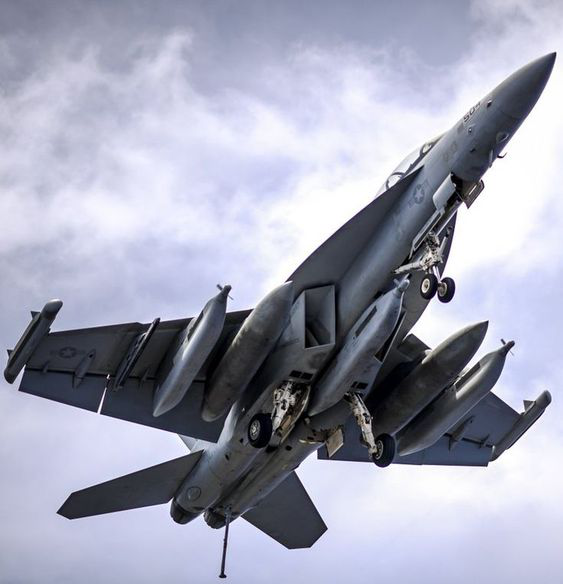

In [ ]:
url= 'https://i.pinimg.com/564x/67/dd/6b/67dd6bf95347bd8a5082b2a361b9d554.jpg'
image_0 = io.imread(url) 
image_1 = cv.cvtColor(image_0, cv.COLOR_BGR2GRAY)
image_2 = cv.cvtColor(image_0, cv.COLOR_BGR2RGB)
cv2_imshow(image_2)

In [ ]:
def thresholding2(image):
    img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    blur = cv.GaussianBlur(img, (5,5), 0)
    ret2, thresh = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    ret, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
    th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
    th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
    titles = ['Original Image', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding','Otsu Thresholding']
    images = [img, th1, th2, th3,thresh]
    fig = plt.figure()
    fig.set_size_inches(10, 10)
    for i in range(5):
        plt.subplot(5, 1, i+1),plt.imshow(images[i], 'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])

    plt.show()

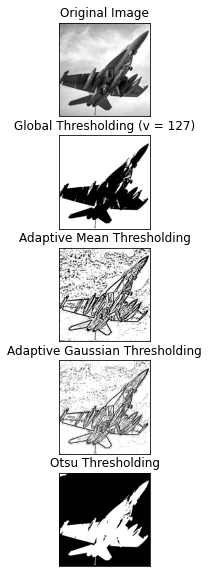

In [ ]:
thresholding2(image_0)


1. Buat sendiri masing masing fungsi image processing thresholding tersebut (dilarang menggunakan fungsi dari lib popular skimage,opencv,PIL,dll)

Gunakan numpy, matplot jika digunakan hanya untuk plot bukan processing


In [ ]:
def globalThresholding(image, threshold):
  # image grayscale yang dibaca diubah ke dalam array
  image_grayscale = np.array(image)

  # Membuat array kosong yang sama ukurannya dengan array dari image_grayscale
  # hal ini bertujuan untuk nantinya diisi dengan nilai putih dan hitam
  image_binary = np.zeros_like(image_grayscale)

  # Mengganti setiap nilai index dengan logika jika indek di dalam array image_grayscale 
  # lebih besar dari threshold atau ambang batas maka nilainya 255
  # tapi jika kurang dari threshold maka nilainya tetap 0
  image_binary[image_grayscale > threshold] = 255


  # Nengembalikkan nilai array dari image_binary
  return image_binary

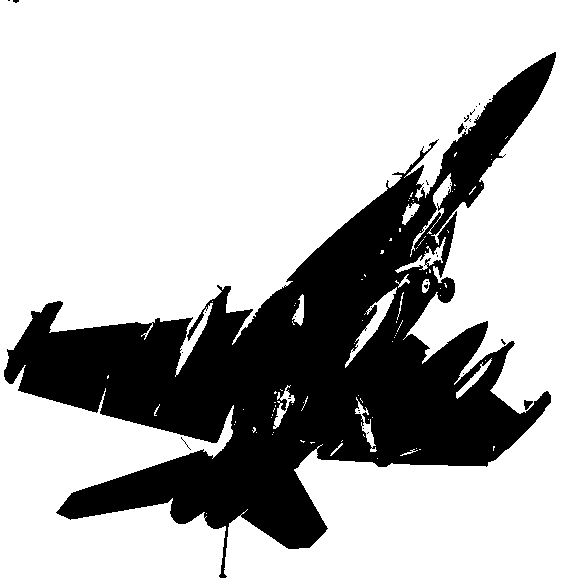

In [ ]:
convertImageToBinary = globalThresholding(image_1, 127)

Image.fromarray(convertImageToBinary).show()

In [ ]:
def adaptive_threshold_mean(img, block_size, c):
    # Memasukkan nilai height dan width dalam sebuah citra yang diinputkan
    h, w = img.shape
    
    # Membuat array kosong agar mudah dalam mengisikan nilai putih dan hitam
    # array ini ukurannya akan sama dengan citra yang diinputkan
    output = np.zeros_like(img)
    
    # Ini tuh akan menambahkan padding di setiap sisi blocknya
    # Misal
    #+------+              +-------+
    #| O O O|              | 0 0 0 |
    #| O O O|    -->       | 0 O O |       
    #| O O O|              | 0 O O |
    #+------+              | 0 O O |
    #                      +-------+

    img_padded = np.pad(img, block_size // 2, mode='constant', constant_values=0)
    
    for y in range(h):
        for x in range(w):
            # Membuat block-block dari image padding dan ini hanya dipantau
            # perblock
            block = img_padded[y:y+block_size, x:x+block_size]
            
            # Dari suatu block yang dipantau itu dihitung rata-ratanya
            block_mean = np.mean(block)
            
            # Untuk menghitung thresholdnya hasil rata-rata di setiap block
            # akan dikurangi oleh konstanta
            threshold = block_mean - c
            
            # Untuk mengganti nilai setiap indeksnya maka diperlukan logika
            # dimana logikan tersebut akan mengecek setiap nilai piksel di dalam
            # block tertentu apakah nilainya melebihi threshold atau tidak
            # jika melebihi maka diganti menjadi nilai 255 (Putih), jikalau 
            # tidak maka diganti 0 (Hitam)
            if img[y, x] >= threshold:
                output[y, x] = 255
            else:
                output[y, x] = 0
    
    return output


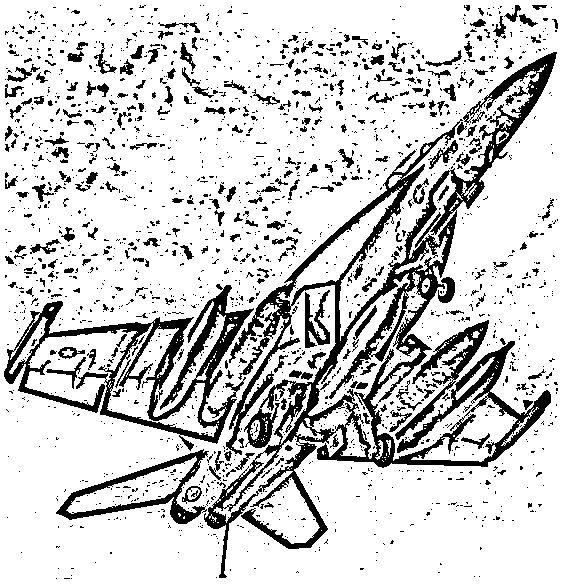

In [ ]:
imageMeanThresholding = adaptive_threshold_mean(image_1, 11, 2)

Image.fromarray(imageMeanThresholding).show()


In [ ]:
def adaptive_threshold_gaussian(img, block_size, c):
    # Memasukkan nilai height dan width dalam sebuah citra yang diinputkan
    h, w = img.shape
    
    # Membuat sebuah array kosong dimana array ini akan memudahkan dalam mengganti
    # nilai menjadi hitam atau putih. Ukuran array ini akan sama dengan ukuran
    # citra yang diinputkan
    output = np.zeros_like(img)
    
    img_padded = np.pad(img, block_size // 2, mode='constant', constant_values=0)
    
    for y in range(h):
        for x in range(w):
            block = img_padded[y:y+block_size, x:x+block_size]
            
            # Bedanya pada adaptive gaussian threshold dengan adaptive 
            # mean threshold, di adaptive gaussian threshold itu di block-block
            # yang udah ditentukan akan digunakan filter gaussian terlebih dahulu
            block_smoothed = gaussian_filter(block, sigma=block_size / 6)
            
            # Menghitung nilai rata-rata dan dikurang dengan konstanta untuk
            # menghasilkan nilai threshold pada suatu block tertentu
            threshold = np.mean(block_smoothed) - c
            
            # Untuk mengganti nilai setiap indeksnya maka diperlukan logika
            # dimana logikan tersebut akan mengecek setiap nilai piksel di dalam
            # block tertentu apakah nilainya melebihi threshold atau tidak
            # jika melebihi maka diganti menjadi nilai 255 (Putih), jikalau 
            # tidak maka diganti 0 (Hitam)
            if img[y, x] >= threshold:
                output[y, x] = 255
            else:
                output[y, x] = 0
    
    return output

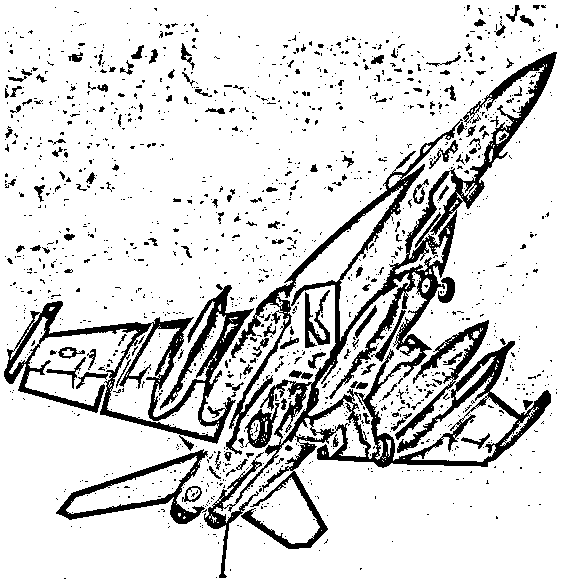

In [ ]:
imgGaussianThreshold = adaptive_threshold_gaussian(image_1, 11, 2)

Image.fromarray(imgGaussianThreshold).show()

In [ ]:
def otsu_threshold(img_gray):
    # Hitung histogram citra grayscale
    hist, bins = np.histogram(img_gray, bins=256, range=(0, 255))
    
    # Normalisasi histogram
    hist_norm = hist.astype('float') / np.sum(hist)
    
    # Hitung probabilitas kelas
    class_prob = np.cumsum(hist_norm)
    
    # Hitung rata-rata kelas
    class_mean = np.cumsum(hist_norm * np.arange(0, 256))
    
    # Hitung rata-rata global
    global_mean = np.sum(hist_norm * np.arange(0, 256))
    
    # Hitung variansi dalam kelas
    class_var = np.zeros_like(hist_norm)
    for i in range(1, 256):
        w0 = class_prob[i]
        w1 = 1 - w0
        u0 = class_mean[i] / w0
        u1 = (global_mean - class_mean[i]) / w1
        class_var[i] = w0 * w1 * (u0 - u1)**2
    
    # Cari nilai threshold yang meminimalkan variansi dalam kelas
    threshold = np.argmax(class_var)
    
    # Konversi citra grayscale menjadi citra biner menggunakan threshold hasil Otsu
    img_binary = np.zeros_like(img_gray)
    img_binary[img_gray >= threshold] = 255
    
    return img_binary


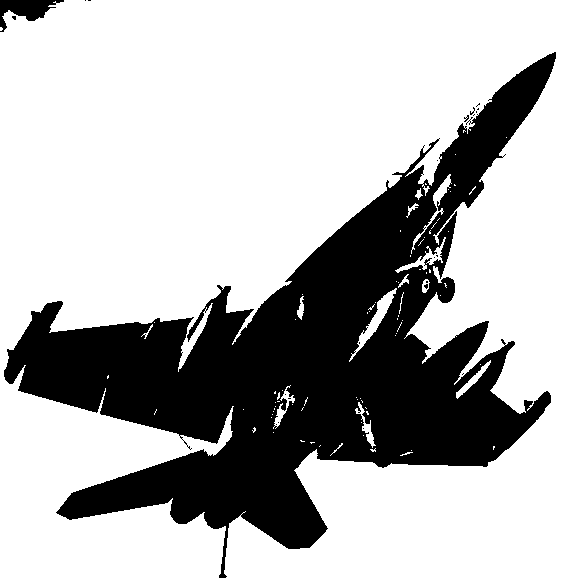

In [ ]:
imgOtsuThreshold = otsu_threshold(image_1)

Image.fromarray(imgOtsuThreshold).show()